#### R<sub>SU</sub> = α × R<sub>SD</sub>

R<sub>SD</sub> is Downwelling Shortwave Radiation from AMATERASS (W/m<sup>2</sup>)<br>
α is Albedo from ERA5

In [1]:
import os
import numpy
import matplotlib.pyplot as plt

In [11]:
def read_site_csv(csv_filename):
    csv_data = numpy.genfromtxt(csv_filename, delimiter=',', dtype=str)
    csv_v = csv_data[:, 1]
    csv_v = csv_v.astype(float)
    return csv_data[:, 0], csv_v


def hourly_to_10min(daily_v):
    tenmin_v = numpy.repeat(daily_v, 6)
    return tenmin_v


def calculate_r_su(alpha, r_sd):
    r_su = alpha * r_sd
    return r_su

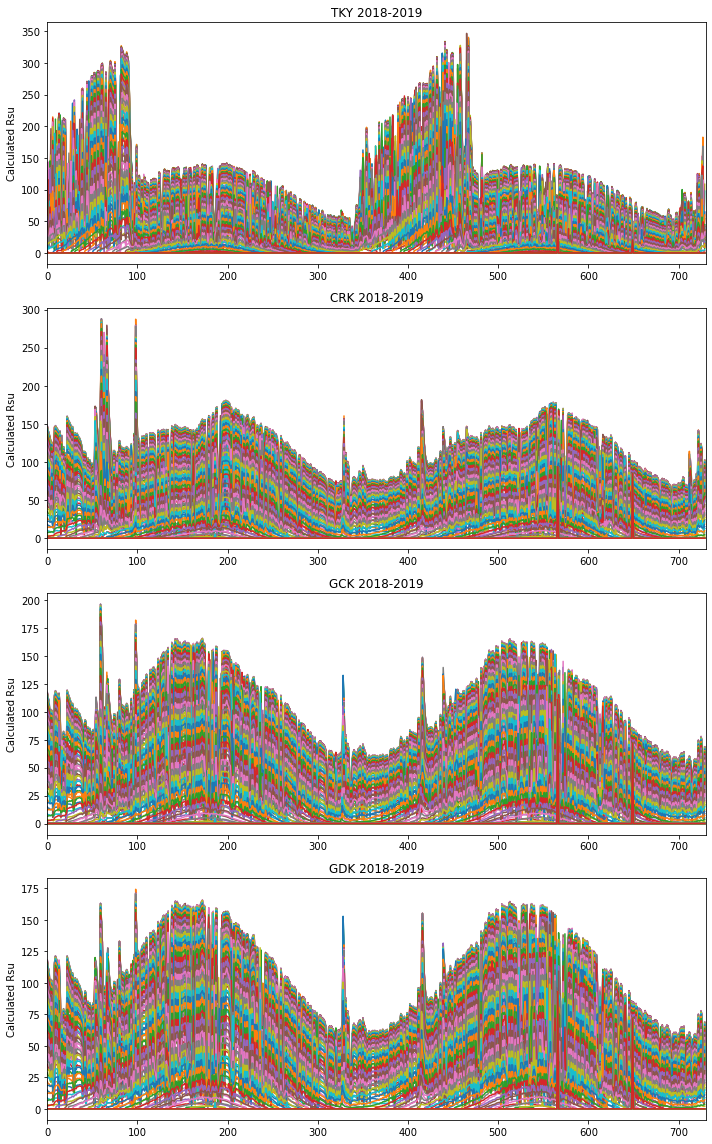

In [13]:
OUTPUT_FOLDER = '/disk2/Data/FluxSite4ET'

site_names = ['TKY', 'CRK', 'GCK', 'GDK']

fig, axes = plt.subplots(len(site_names), 1, figsize=(10, 4 * len(site_names)))    

for i, site_name in enumerate(site_names):
    Rsd_SITE_CSV = '/disk2/Data/FluxSite4ET/' + site_name + '_AMATERASS_Rsd.csv'
    r_sd_timelist, r_sd_10min = read_site_csv(Rsd_SITE_CSV)
    Albedo_SITE_CSV = '/disk2/Data/FluxSite4ET/' + site_name + '_ERA5_Albedo.csv'
    albedo_timelist, albedo_hourly = read_site_csv(Albedo_SITE_CSV)
    albedo_10min = hourly_to_10min(albedo_hourly)
    r_su_10min = calculate_r_su(albedo_10min, r_sd_10min)
    
    r_su_record = r_su_10min.astype(str)
    r_su_csv_ = numpy.column_stack((r_sd_timelist, r_su_record))
    numpy.savetxt(os.path.join(OUTPUT_FOLDER, site_name+'_Rsu'+'.csv'), r_su_csv_, delimiter=",", fmt='%s')

    data_day = r_su_10min.reshape(365 * 2, 24 * 6)
    
    axes[i].plot(numpy.arange(365 * 2), data_day)
    axes[i].set_title(site_name + ' 2018-2019')
    axes[i].set_xlim(0, 365 * 2)
    axes[i].set_ylabel('Calculated Rsu')

plt.tight_layout()
plt.show()